# Microgrants & Honoraria

In [171]:
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd
import pycountry
import seaborn as sns

In [156]:
COUNTRY_ALPHA2_TO_CONTINENT = {
    "AB": "Asia",
    "AD": "Europe",
    "AE": "Asia",
    "AF": "Asia",
    "AG": "North America",
    "AI": "North America",
    "AL": "Europe",
    "AM": "Asia",
    "AO": "Africa",
    "AR": "South America",
    "AS": "Oceania",
    "AT": "Europe",
    "AU": "Oceania",
    "AW": "North America",
    "AX": "Europe",
    "AZ": "Asia",
    "BA": "Europe",
    "BB": "North America",
    "BD": "Asia",
    "BE": "Europe",
    "BF": "Africa",
    "BG": "Europe",
    "BH": "Asia",
    "BI": "Africa",
    "BJ": "Africa",
    "BL": "North America",
    "BM": "North America",
    "BN": "Asia",
    "BO": "South America",
    "BQ": "North America",
    "BR": "South America",
    "BS": "North America",
    "BT": "Asia",
    "BV": "Antarctica",
    "BW": "Africa",
    "BY": "Europe",
    "BZ": "North America",
    "CA": "North America",
    "CC": "Asia",
    "CD": "Africa",
    "CF": "Africa",
    "CG": "Africa",
    "CH": "Europe",
    "CI": "Africa",
    "CK": "Oceania",
    "CL": "South America",
    "CM": "Africa",
    "CN": "Asia",
    "CO": "South America",
    "CR": "North America",
    "CU": "North America",
    "CV": "Africa",
    "CW": "North America",
    "CX": "Asia",
    "CY": "Asia",
    "CZ": "Europe",
    "DE": "Europe",
    "DJ": "Africa",
    "DK": "Europe",
    "DM": "North America",
    "DO": "North America",
    "DZ": "Africa",
    "EC": "South America",
    "EE": "Europe",
    "EG": "Africa",
    "ER": "Africa",
    "ES": "Europe",
    "ET": "Africa",
    "FI": "Europe",
    "FJ": "Oceania",
    "FK": "South America",
    "FM": "Oceania",
    "FO": "Europe",
    "FR": "Europe",
    "GA": "Africa",
    "GB": "Europe",
    "GD": "North America",
    "GE": "Asia",
    "GF": "South America",
    "GG": "Europe",
    "GH": "Africa",
    "GI": "Europe",
    "GL": "North America",
    "GM": "Africa",
    "GN": "Africa",
    "GP": "North America",
    "GQ": "Africa",
    "GR": "Europe",
    "GS": "South America",
    "GT": "North America",
    "GU": "Oceania",
    "GW": "Africa",
    "GY": "South America",
    "HK": "Asia",
    "HM": "Antarctica",
    "HN": "North America",
    "HR": "Europe",
    "HT": "North America",
    "HU": "Europe",
    "ID": "Asia",
    "IE": "Europe",
    "IL": "Asia",
    "IM": "Europe",
    "IN": "Asia",
    "IO": "Asia",
    "IQ": "Asia",
    "IR": "Asia",
    "IS": "Europe",
    "IT": "Europe",
    "JE": "Europe",
    "JM": "North America",
    "JO": "Asia",
    "JP": "Asia",
    "KE": "Africa",
    "KG": "Asia",
    "KH": "Asia",
    "KI": "Oceania",
    "KM": "Africa",
    "KN": "North America",
    "KP": "Asia",
    "KR": "Asia",
    "KW": "Asia",
    "KY": "North America",
    "KZ": "Asia",
    "LA": "Asia",
    "LB": "Asia",
    "LC": "North America",
    "LI": "Europe",
    "LK": "Asia",
    "LR": "Africa",
    "LS": "Africa",
    "LT": "Europe",
    "LU": "Europe",
    "LV": "Europe",
    "LY": "Africa",
    "MA": "Africa",
    "MC": "Europe",
    "MD": "Europe",
    "ME": "Europe",
    "MF": "North America",
    "MG": "Africa",
    "MH": "Oceania",
    "MK": "Europe",
    "ML": "Africa",
    "MM": "Asia",
    "MN": "Asia",
    "MO": "Asia",
    "MP": "Oceania",
    "MQ": "North America",
    "MR": "Africa",
    "MS": "North America",
    "MT": "Europe",
    "MU": "Africa",
    "MV": "Asia",
    "MW": "Africa",
    "MX": "North America",
    "MY": "Asia",
    "MZ": "Africa",
    "NA": "Africa",
    "NC": "Oceania",
    "NE": "Africa",
    "NF": "Oceania",
    "NG": "Africa",
    "NI": "North America",
    "NL": "Europe",
    "NO": "Europe",
    "NP": "Asia",
    "NR": "Oceania",
    "NU": "Oceania",
    "NZ": "Oceania",
    "OM": "Asia",
    "OS": "Asia",
    "PA": "North America",
    "PE": "South America",
    "PF": "Oceania",
    "PG": "Oceania",
    "PH": "Asia",
    "PK": "Asia",
    "PL": "Europe",
    "PM": "North America",
    "PR": "North America",
    "PS": "Asia",
    "PT": "Europe",
    "PW": "Oceania",
    "PY": "South America",
    "QA": "Asia",
    "RE": "Africa",
    "RO": "Europe",
    "RS": "Europe",
    "RU": "Europe",
    "RW": "Africa",
    "SA": "Asia",
    "SB": "Oceania",
    "SC": "Africa",
    "SD": "Africa",
    "SE": "Europe",
    "SG": "Asia",
    "SH": "Africa",
    "SI": "Europe",
    "SJ": "Europe",
    "SK": "Europe",
    "SL": "Africa",
    "SM": "Europe",
    "SN": "Africa",
    "SO": "Africa",
    "SR": "South America",
    "SS": "Africa",
    "ST": "Africa",
    "SV": "North America",
    "SY": "Asia",
    "SZ": "Africa",
    "TC": "North America",
    "TD": "Africa",
    "TG": "Africa",
    "TH": "Asia",
    "TJ": "Asia",
    "TK": "Oceania",
    "TM": "Asia",
    "TN": "Africa",
    "TO": "Oceania",
    "TP": "Asia",
    "TR": "Asia",
    "TT": "North America",
    "TV": "Oceania",
    "TW": "Asia",
    "TZ": "Africa",
    "UA": "Europe",
    "UG": "Africa",
    "US": "North America",
    "UY": "South America",
    "UZ": "Asia",
    "VC": "North America",
    "VE": "South America",
    "VG": "North America",
    "VI": "North America",
    "VN": "Asia",
    "VU": "Oceania",
    "WF": "Oceania",
    "WS": "Oceania",
    "XK": "Europe",
    "YE": "Asia",
    "YT": "Africa",
    "ZA": "Africa",
    "ZM": "Africa",
    "ZW": "Africa",
}

def get_continent(country):
    """
    Get continent

    :param country: name of the country
    """
    py_country = pycountry.countries.get(name=country)
    if py_country is None:
        py_country = pycountry.countries.get(common_name=country)
        return ""
    else:
        if py_country.alpha_2 not in COUNTRY_ALPHA2_TO_CONTINENT:
            return ""
        else:
            return COUNTRY_ALPHA2_TO_CONTINENT[py_country.alpha_2]

rate = {
    "GBP": 1,
    "USD": 0.8,
    "EUR": 0.86,
    "": 1
}

## Honoraria

In [147]:
url = "https://docs.google.com/spreadsheets/d/1OUO4HcCeGfU9OfgrSif-sdDiqUKrxqsppxjvwns9wPE/export?format=csv&gid=0"
honor_bf_civi_df = (
    pd.read_csv(url)
    .fillna("")
    .assign(Role= lambda df: df.Role.str.split(", "))
)
honor_bf_civi_df["Continent"] = honor_bf_civi_df.Country.apply(lambda x: get_continent(x))

In [148]:
honor_in_civi_fp = Path("../data/openseeds/honorarium.csv") 
honor_in_civi_df = (
    pd.read_csv(honor_in_civi_fp)
    .fillna("")
    .rename(columns = {
        "Honorarium administration: Cohort": "Cohort",
        "Honorarium administration: Role": "Role",
        "Honorarium administration: Final cost": "Amount",
        "Contact: ": "Country",
    })
    .replace("Speaker (Expert talk)", "speaker")
    .replace("speaker for Open Data", "speaker")
    .replace("Speaker", "speaker")
    .replace("Mentor", "mentor")
    .replace("Call Facilitator", "facilitator")
    .replace("Call facilitator", "facilitator")
    .replace("Facilitator (co-hosted 2 meetings and Transcription of the three (3) graduation videos", "facilitator")
    .replace("Transcription of the videos, preparing guideline for the transcription", "facilitator")
    .replace("facilitator role (transcript check - week 2 and 3 cohort calls)", "facilitator")
    .replace("facilitator  (co-host a session )", "facilitator")
    .replace("facilitator (co-host a session)", "facilitator")
    .replace("Facilitator - transcription check", "facilitator")
    .replace("facilitator; transcription check", "facilitator")
    .replace("Video Facilitator", "facilitator")
    .replace("transcription check", "facilitator")
    .replace("Ally Skills workshop facilitator", "facilitator")
    .replace("Facilitator and Speaker", "speaker, facilitator")
    .replace("Mentor and expert", "mentor, expert")
    .replace("co-facilitator, transcriber", "facilitator")
    .replace("Facilitator", "facilitator")
    .assign(Role= lambda df: df.Role.str.split(", "))
    .drop(columns = ["Case ID"])
)
honor_in_civi_df["Currency"] = honor_in_civi_df.Amount.apply(lambda x: x.split(" ")[1] if " " in x else "")
honor_in_civi_df["Amount"] = honor_in_civi_df.Amount.apply(lambda x: float(x.split(" ")[0]) if " " in x else 0)
honor_in_civi_df["Continent"] = honor_in_civi_df.Country.apply(lambda x: get_continent(x))

In [149]:
honor_df = (
    pd.concat([honor_bf_civi_df, honor_in_civi_df], ignore_index=True)
)
honor_df["Rate"] = honor_df.Currency.apply(lambda x: rate[x])
honor_df=(
    honor_df
    .assign(Amount= lambda df: df.Amount * df.Rate)
    .drop(columns = ["Currency", "Rate"])
)
honor_df

,Cohort,Role,Amount,Country,Continent
0,OLS-6,[speaker],212.9300,Colombia,South America
1,OLS-6,[facilitator],377.4900,United Kingdom,Europe
2,OLS-6,[speaker],211.5300,United Kingdom,Europe
3,OLS-6,[speaker],212.5700,,
4,OLS-6,[speaker],211.0700,Netherlands,Europe
...,...,...,...,...,...
138,OLS-7,[facilitator],121.3700,,
139,OLS-7,[facilitator],59.6926,France,Europe
140,OLS-6,[mentor],416.9800,Germany,Europe
141,OLS-7,[mentor],393.9402,Germany,Europe


### Overview

Number of honoraria

In [82]:
sum(honor_df.Amount)

34908.9642

Total amount (in GBP)

In [84]:
len(honor_df)

143

Mean amount per honorarium

In [85]:
sum(honor_df.Amount)/len(honor_df)

244.11863076923078

### Per cohort

In [98]:
number_df = (
    honor_df
    .groupby(by="Cohort")
    .count()
    .drop(columns = ["Amount", "Country", "Continent"])
    .rename(columns = {"Role": "Number"})
)
amount_df = (
    honor_df
    .drop(columns = ["Role", "Country", "Continent"])
    .groupby(by="Cohort")
    .sum()
)
cohort_honor_df = number_df.join(amount_df)
cohort_honor_df

,Number,Amount
Cohort,,
OLS-5,38,11926.6882
OLS-6,25,5651.0730
OLS-7,52,13526.7310
OLS-8,28,3804.4720


Text(0.5, 0, '')

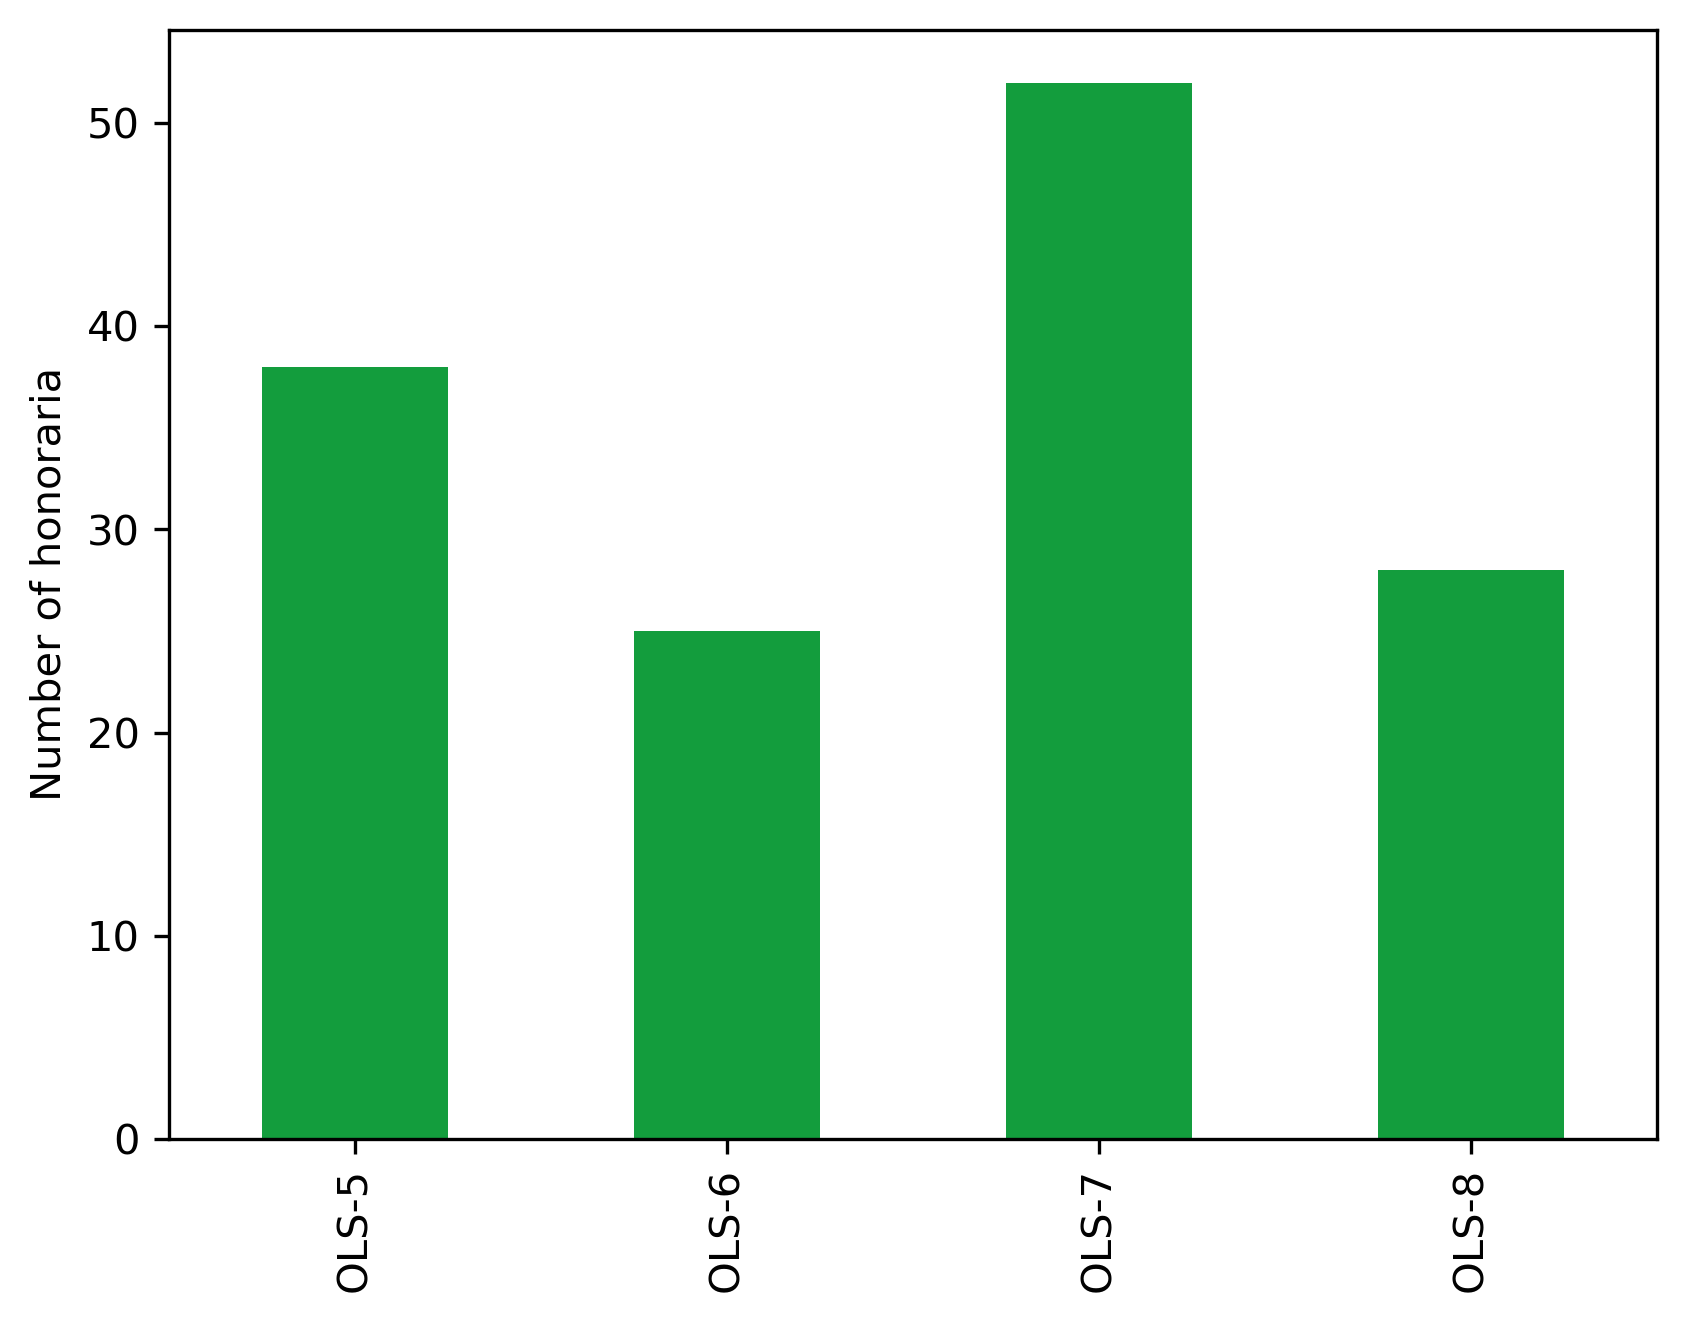

In [99]:
fig, ax = plt.subplots()
fig.set_dpi(300)
(cohort_honor_df.Number
     .transpose()
     .plot.bar(ax=ax, color="#139D3D"))
plt.ylabel("Number of honoraria")
plt.xlabel("")

Text(0.5, 0, '')

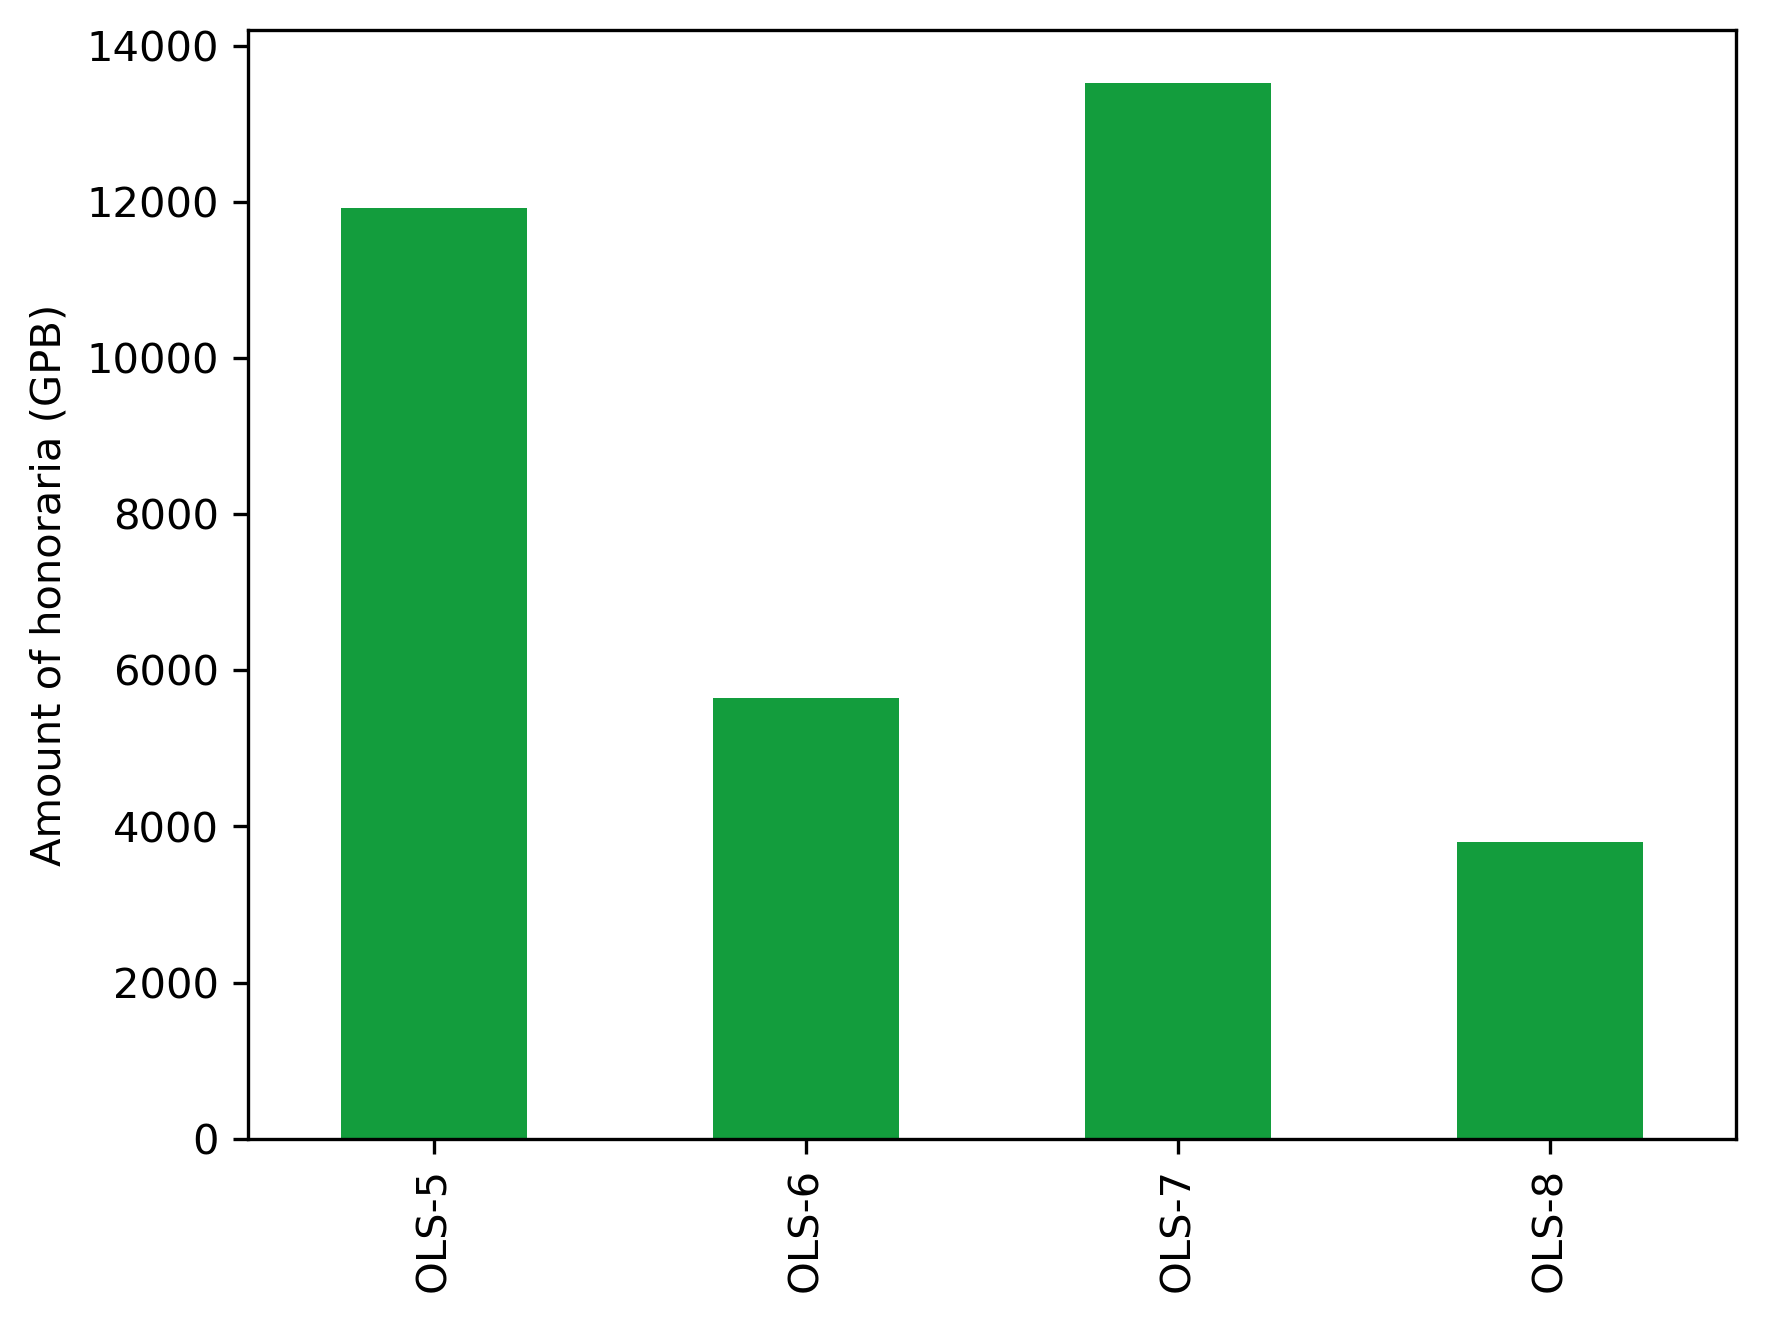

In [100]:
fig, ax = plt.subplots()
fig.set_dpi(300)
(cohort_honor_df.Amount
     .transpose()
     .plot.bar(ax=ax, color="#139D3D"))
plt.ylabel("Amount of honoraria (GPB)")
plt.xlabel("")

### Per role

In [139]:
number_df = (
    honor_df
    .groupby(honor_df["Role"].map(tuple))
    .count()
    .drop(columns = ["Amount", "Country", "Continent", "Cohort"])
    .rename(columns = {"Role": "Number"})
)
amount_df = (
    honor_df
    .drop(columns = ["Cohort", "Country", "Continent"])
    .groupby(honor_df["Role"].map(tuple))
    .sum()
    .drop(columns = ["Role"])
)
role_honor_df = number_df.join(amount_df)
index_rename = {}
for i in role_honor_df.index:
    index_rename[i] = " & ".join(i)
role_honor_df = (
    role_honor_df
    .rename(index_rename, axis="index")
    .sort_values("Number")
)
role_honor_df

,Number,Amount
Role,,
mentor & expert,1,393.5900
speaker & facilitator,1,370.5800
facilitator & mentor,2,906.3608
facilitator,33,5071.8482
mentor,50,17872.3722
speaker,56,10294.2130


Text(0.5, 0, '')

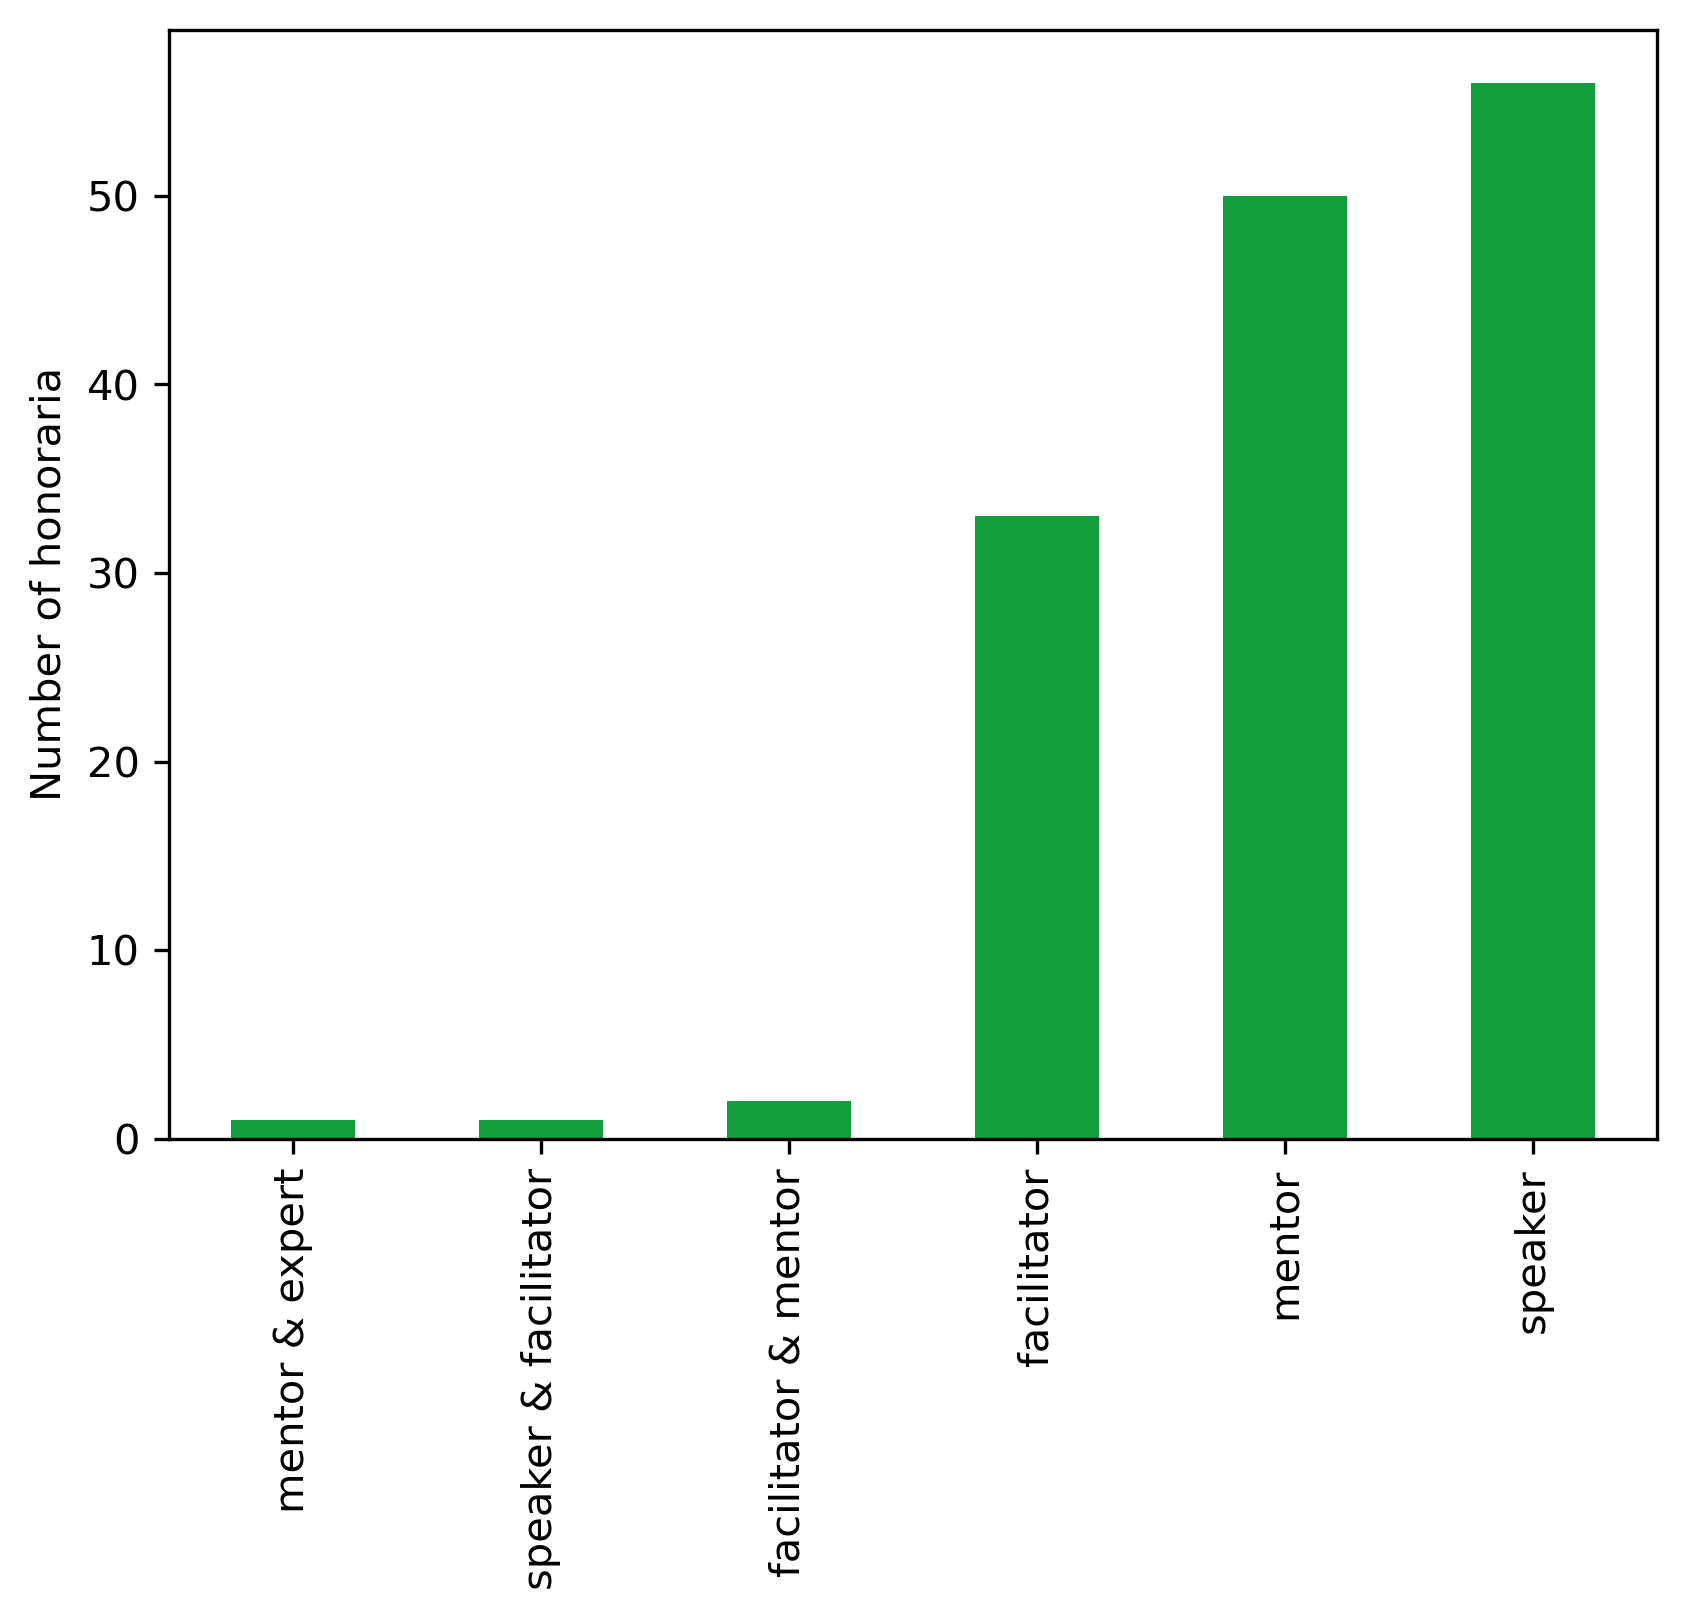

In [141]:
fig, ax = plt.subplots()
fig.set_dpi(300)
(role_honor_df.Number
     .transpose()
     .plot.bar(ax=ax, color="#139D3D"))
plt.ylabel("Number of honoraria")
plt.xlabel("")

Text(0.5, 0, '')

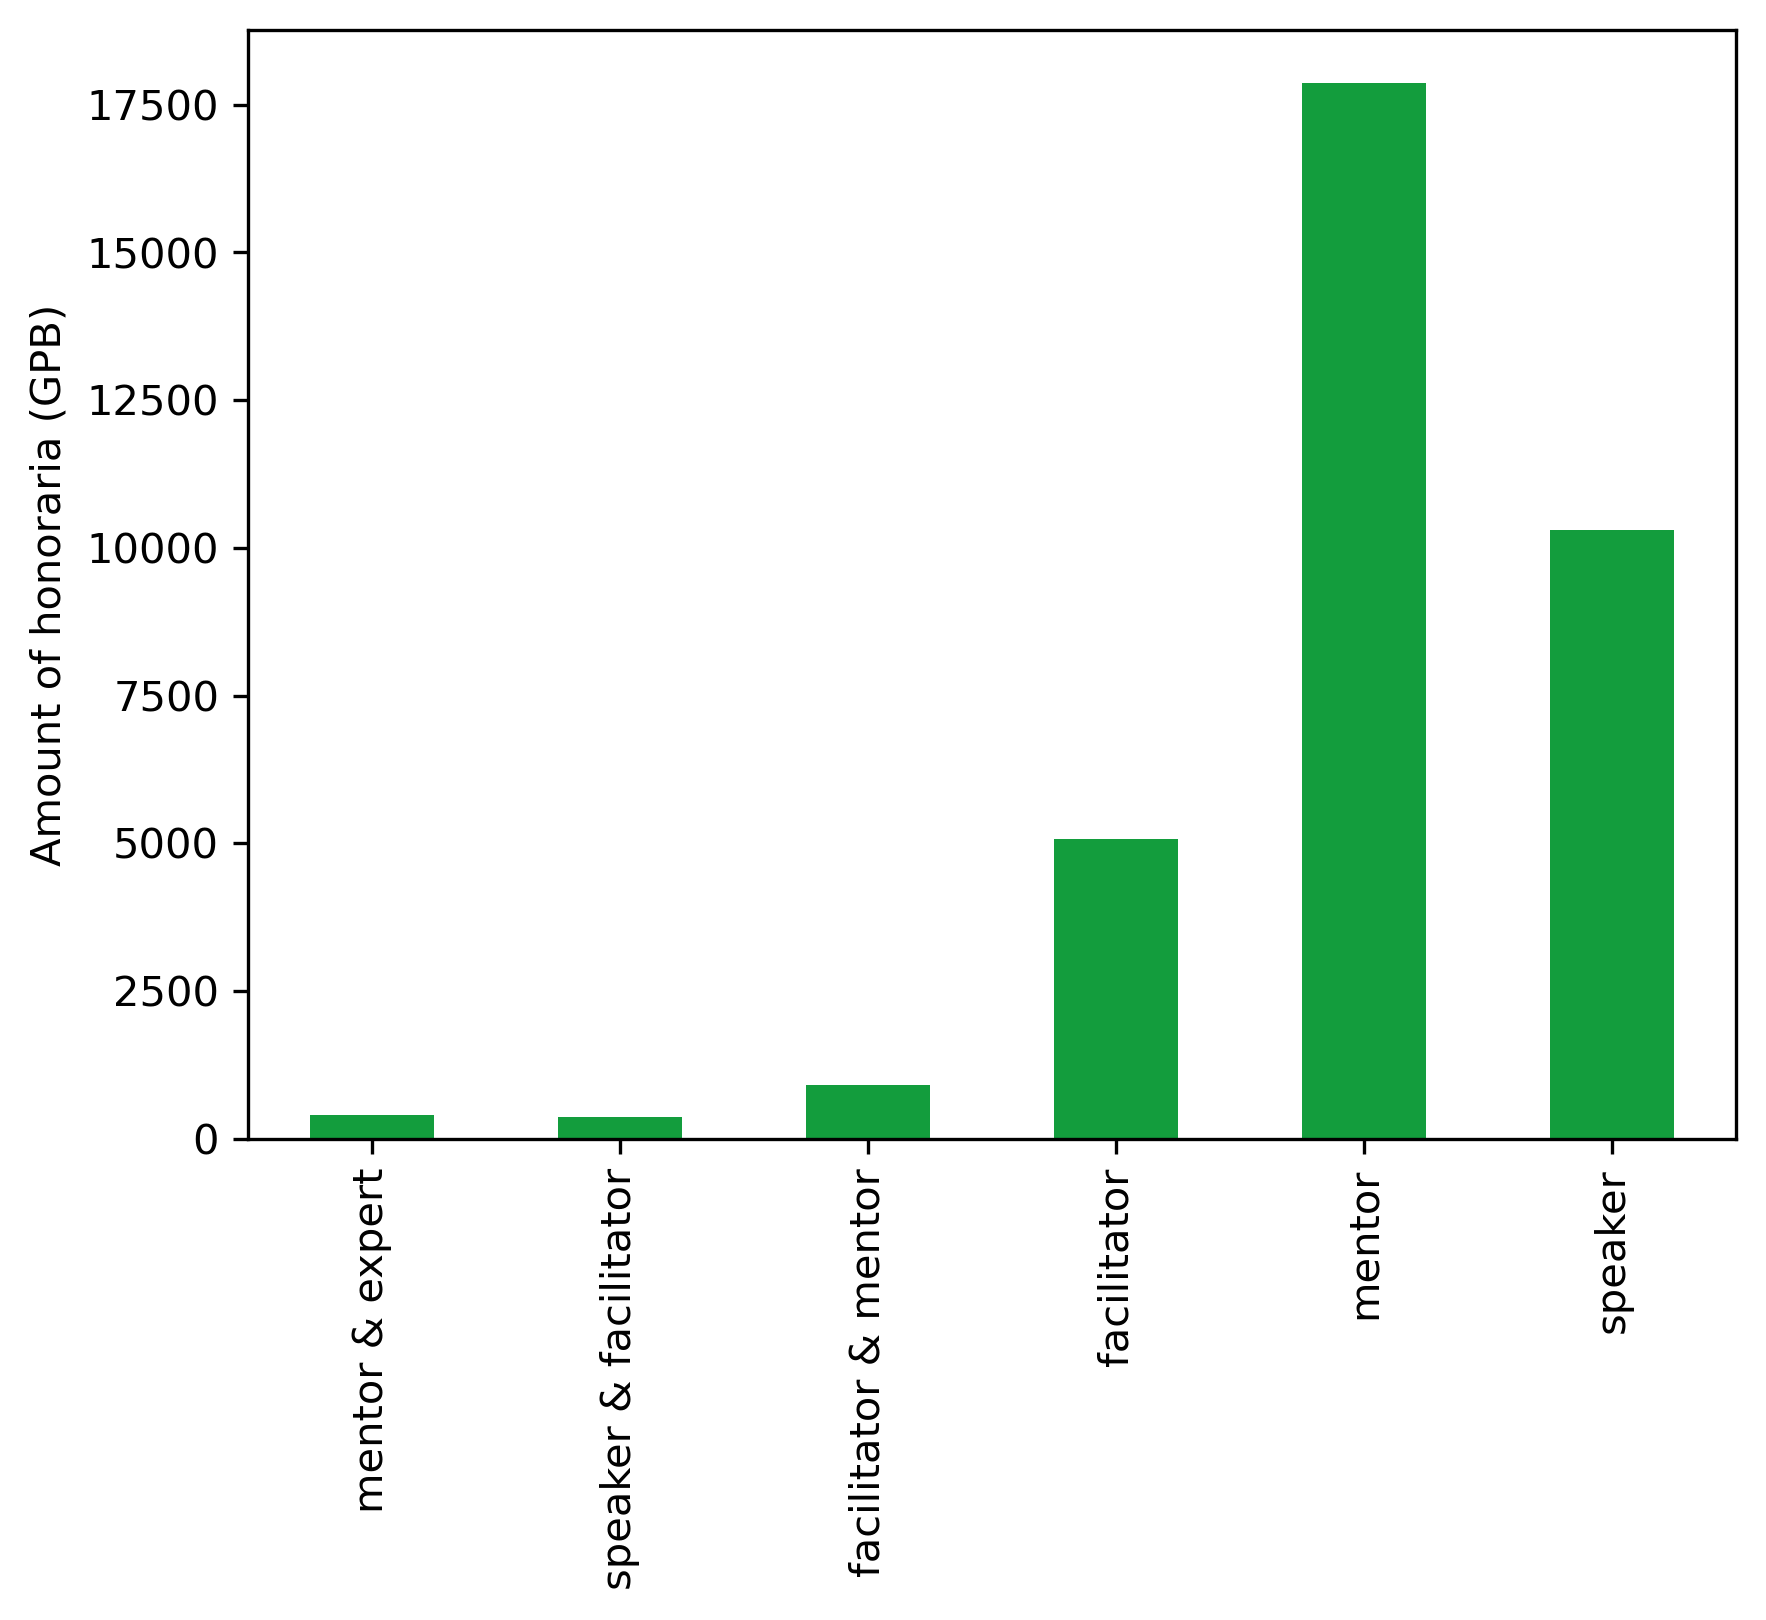

In [142]:
fig, ax = plt.subplots()
fig.set_dpi(300)
(role_honor_df.Amount
     .transpose()
     .plot.bar(ax=ax, color="#139D3D"))
plt.ylabel("Amount of honoraria (GPB)")
plt.xlabel("")

### Per continent

In [161]:
number_df = (
    honor_df
    .groupby(by="Continent")
    .count()
    .drop(columns = ["Amount", "Country", "Role"])
    .rename(columns = {"Cohort": "Number"})
)
amount_df = (
    honor_df
    .drop(columns = ["Role", "Country", "Cohort"])
    .groupby(by="Continent")
    .sum()
)
continent_honor_df = number_df.join(amount_df)
tmp = continent_honor_df[continent_honor_df.index!=''].sort_values("Number")
continent_honor_df = pd.concat([tmp, continent_honor_df[continent_honor_df.index=='']])
continent_honor_df

,Number,Amount
Continent,,
Oceania,2,403.6200
Asia,7,1851.4600
North America,12,3052.8180
South America,14,3942.5440
Africa,35,8013.4230
Europe,53,14390.0392
,20,3255.0600


Text(0.5, 0, '')

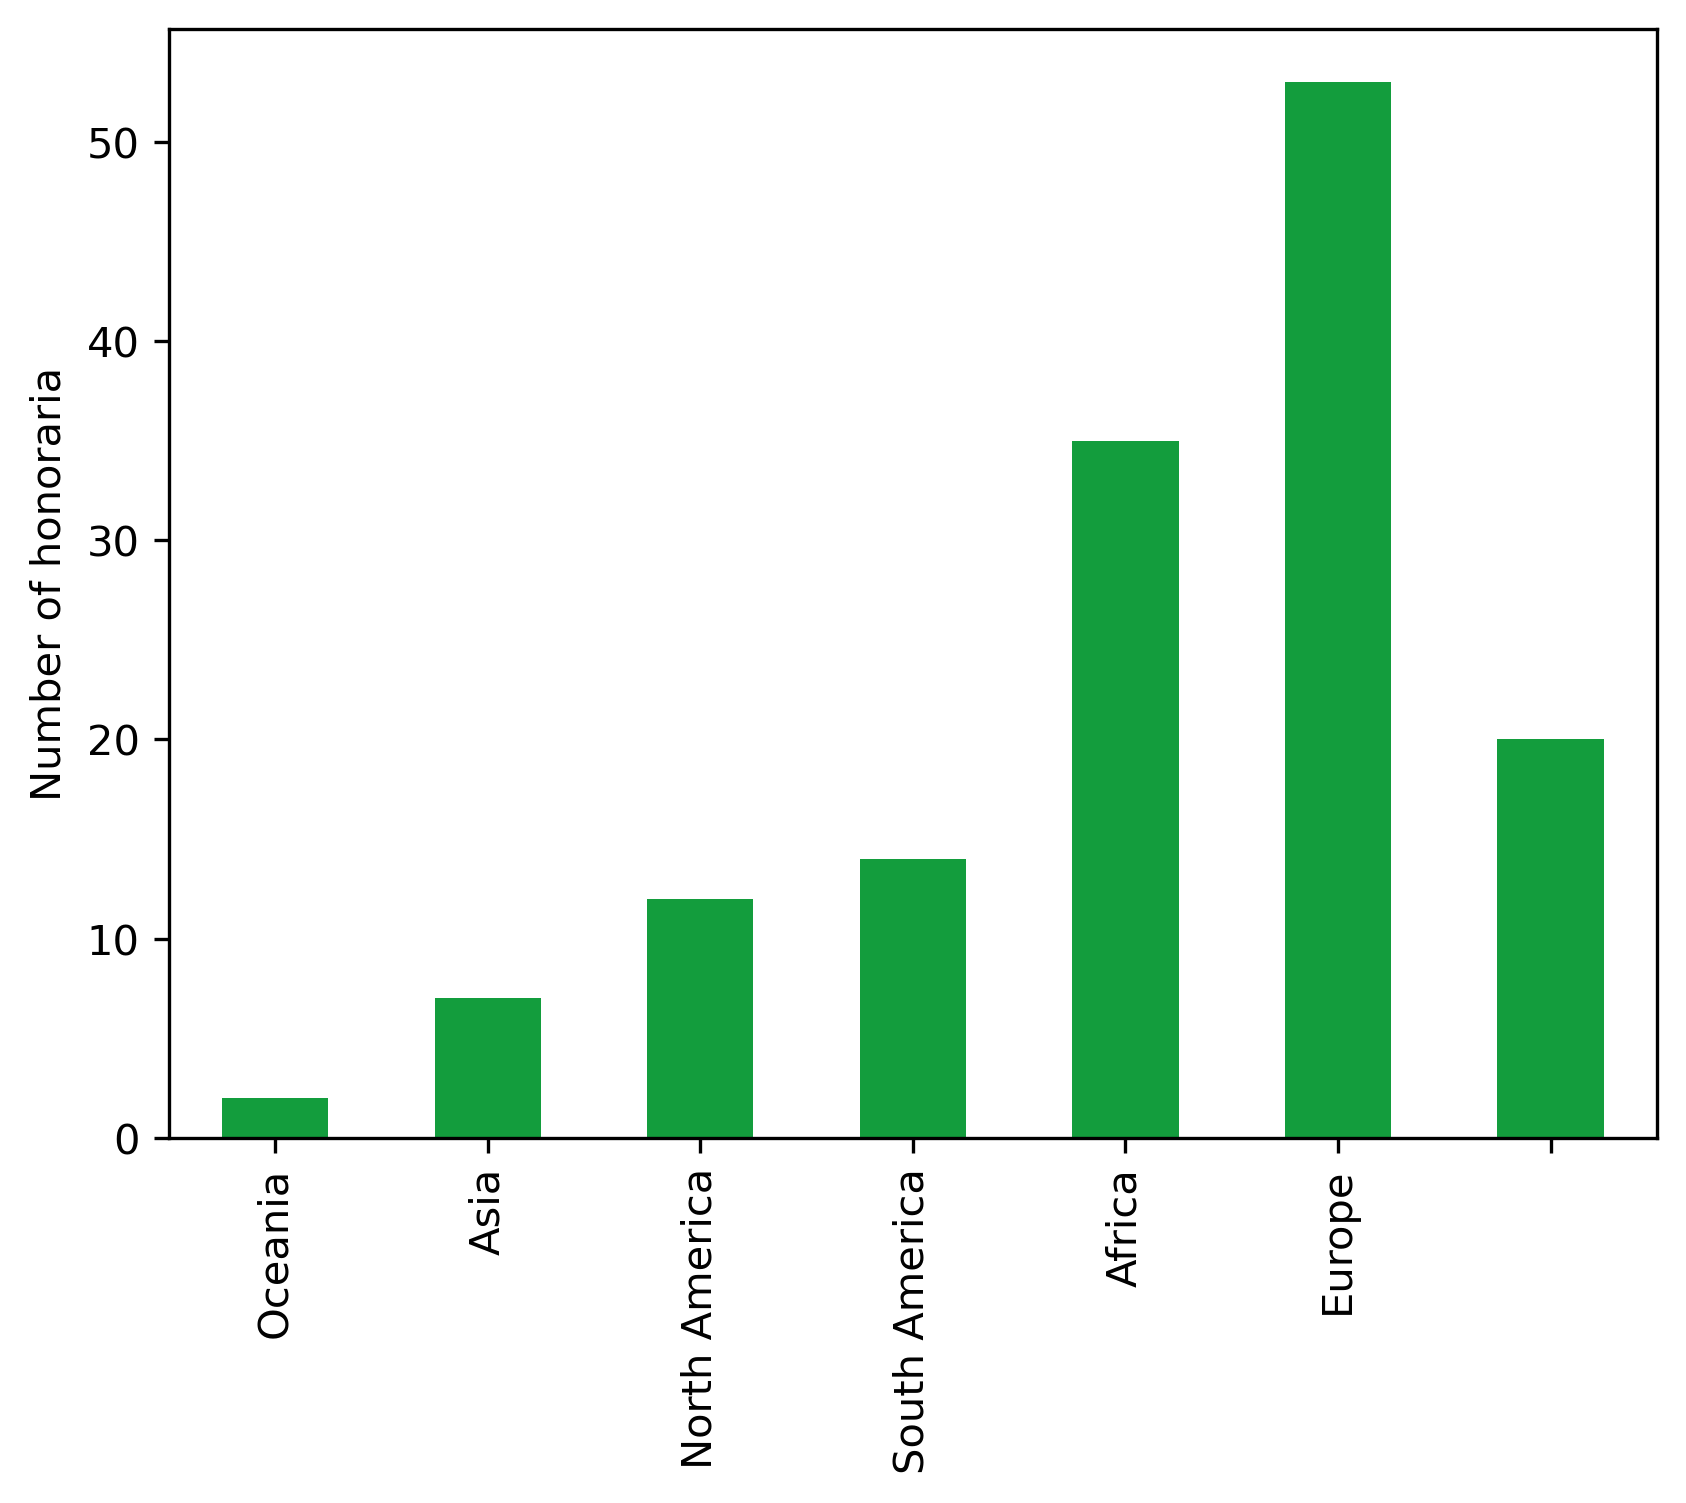

In [162]:
fig, ax = plt.subplots()
fig.set_dpi(300)
(continent_honor_df.Number
     .transpose()
     .plot.bar(ax=ax, color="#139D3D"))
plt.ylabel("Number of honoraria")
plt.xlabel("")

Text(0.5, 0, '')

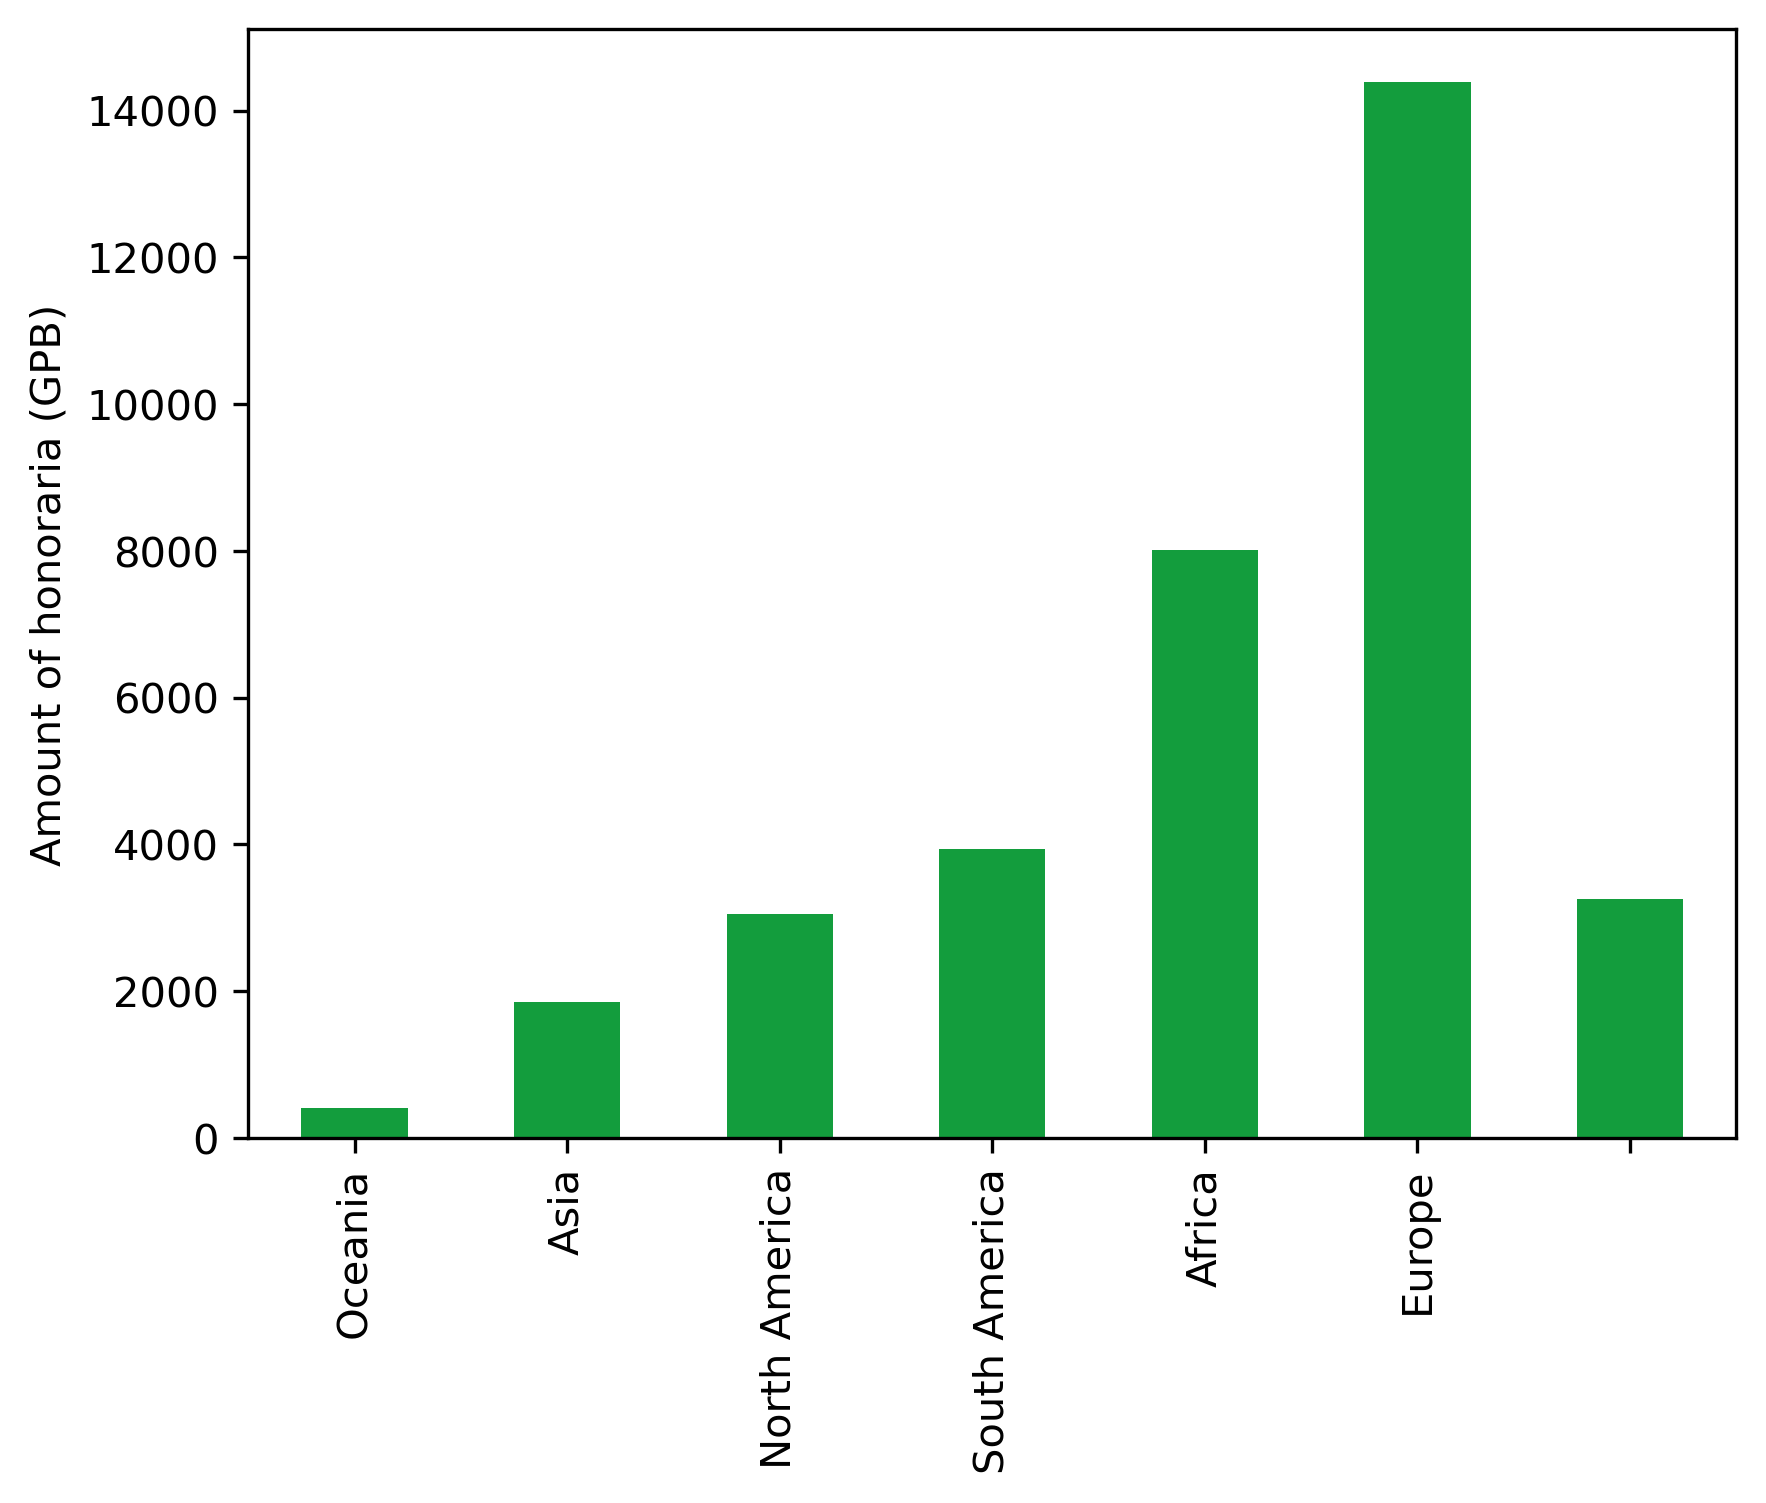

In [163]:
fig, ax = plt.subplots()
fig.set_dpi(300)
(continent_honor_df.Amount
     .transpose()
     .plot.bar(ax=ax, color="#139D3D"))
plt.ylabel("Amount of honoraria (GPB)")
plt.xlabel("")

## Per cohort and continent

In [176]:
cohort_continent_df = (
    honor_df
    .drop(columns = ["Role", "Country"])
    .groupby(by=["Continent","Cohort"])
    .sum()
)
cohort_continent_df = pd.pivot_table(amount_df, index = 'Continent', columns = 'Cohort', values="Amount")
cohort_continent_df

Cohort,OLS-5,OLS-6,OLS-7,OLS-8
Continent,,,,
,200.7800,212.570,1440.970,1400.740
Africa,1865.4200,1383.213,3400.460,1364.330
Asia,842.8000,211.140,598.770,198.750
Europe,6963.7682,2776.940,4190.479,458.852
North America,408.4100,854.280,1588.712,201.416
Oceania,200.0000,NaN,203.620,NaN
South America,1445.5100,212.930,2103.720,180.384


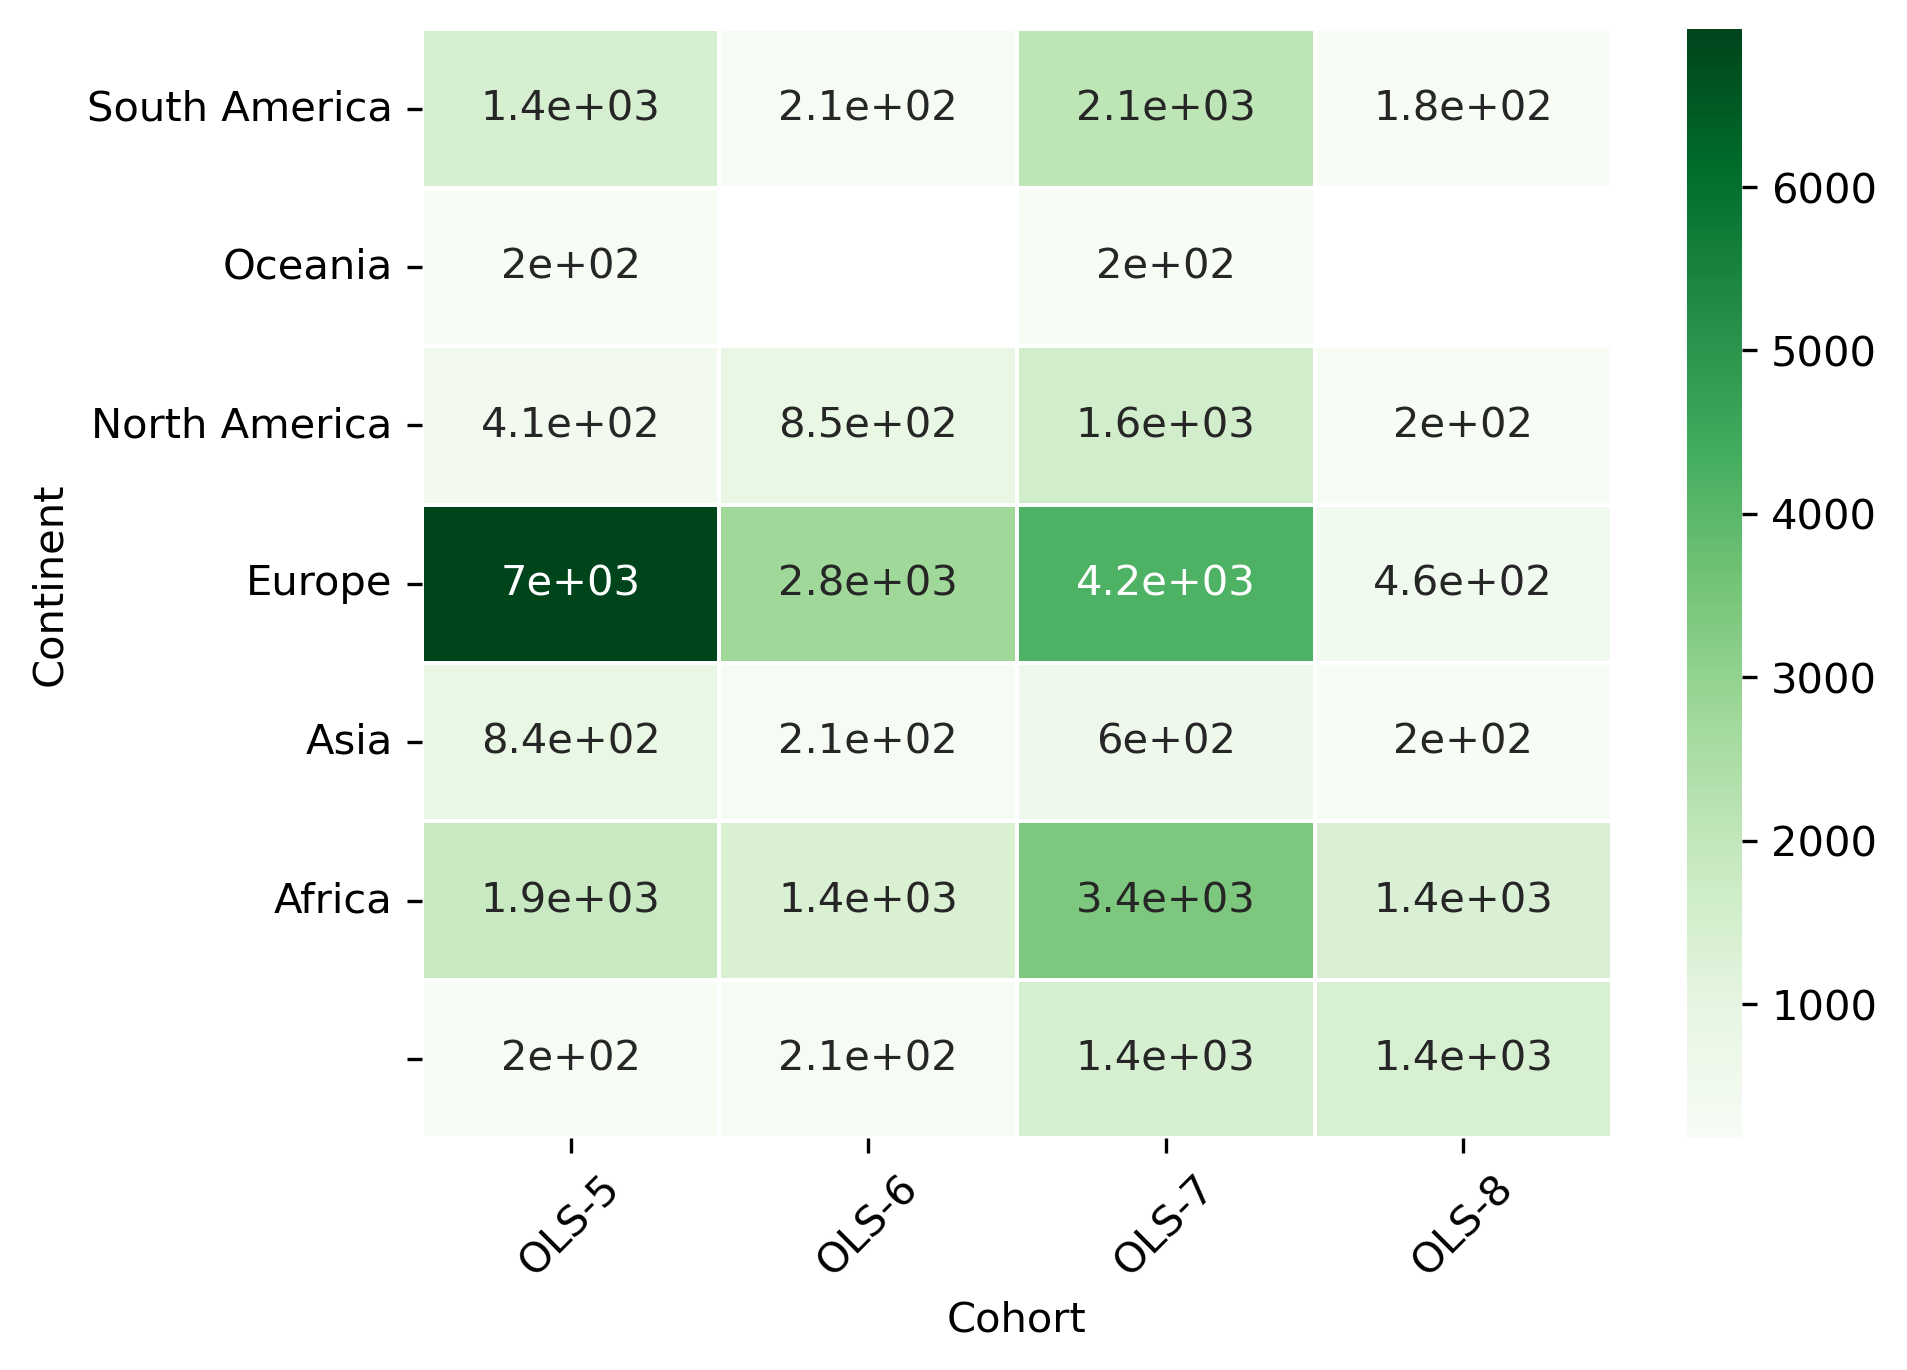

In [177]:
fig, ax = plt.subplots()
fig.set_dpi(300)
sns.heatmap(cohort_continent_df[::-1], cmap='Greens', linewidths=0.5, annot=True)
plt.xticks(rotation=45)
plt.yticks(rotation='horizontal')
plt.show()

In [11]:
# when Civi API

CIVI_API = "" #os.getenv('CIVI_API')

headers = {
#    "X-Civi-Auth": f"Bearer {CIVI_API}",
    'Content-Type': "application/x-www-form-urlencoded",
}

selected_fields = ["Honorarium_administration.Cohort","Honorarium_administration.Role","Honorarium_administration.Final_cost"]
s_f_str = '['
for f in selected_fields:
    s_f_str = f'{s_f_str}, {f}'
s_f_str = f'{s_f_str}]'

where_fields = [["case_type_id:label","=","Honorarium"]]
w_f_str = '['
for f in where_fields:
    w_f_str = f'{w_f_str}, [{f[0]}, {f[1]}, {f[2]}]'
w_f_str = f'{s_f_str}]'

data = {
    #"params": f'{"select": {s_f_str}, "where": {w_f_str}, "limit":200}',
}

#response = requests.post('https://openlifescience.civicrm.org/civicrm/ajax/api4/Case/get', headers=headers, data=data)